# SIRD Model

Basic SIRD model for Indonesia Covid 
(data until 20200425) using PSO optimization

![SIRD](../images/Scheme-of-Susceptible-Infectious-Recovered-Death-SIRD-Model-Boxes-represent.png)

In [8]:
PATH_DATA = '../data/raw/'
PATH_DATA_INTERIM = '../data/interim/'
PATH_SRC='../src/'
PATH_IMG='../images/'

In [9]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [10]:
import pandas as pd
import scipy.integrate as spi
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt
import pyswarms as ps
import sys

sys.path.insert(1, PATH_SRC)
from covid_model import sird_model, pso_sird

In [11]:
## Assumption
NUMB_OF_POPS=200000000
CURR_DATE='20200425'

## Get The Data

Getting the data and do the summary

In [12]:
col_use=['Sus','Inf','Rec','Dea']
col_use_pred=[x+'_pred' for x in col_use]

In [13]:
## Get The Raw Data
df_daily0=pd.read_csv(PATH_DATA+'20200404_DailyCase_ID.csv')
df_daily1=pd.read_csv(PATH_DATA+'20200412_DailyCase_ID.csv')
df_daily2=pd.read_csv(PATH_DATA+CURR_DATE+'_DailyCase_ID.csv')

df_daily=pd.concat([df_daily0,df_daily1,df_daily2]).drop_duplicates()
df_daily=df_daily.reset_index()
del df_daily['index']
df_daily=df_daily.fillna(0)

## Get the compartment value
df_daily['Rec']=df_daily['Sembuh (baru)'].cumsum()
df_daily['Dea']=df_daily['Meninggal (baru)'].cumsum()
df_daily['Inf']=df_daily['Kasus (Kumulatif)']-df_daily['Rec']-df_daily['Dea']
df_daily['Sus']=NUMB_OF_POPS-df_daily['Inf']-df_daily['Rec']-df_daily['Dea']
df_daily.to_csv(PATH_DATA_INTERIM+CURR_DATE+'_DailyCase_ID_SIRD.csv',index=False)

## Standardized it by divide it by population number
df_daily_sird=df_daily[col_use]/NUMB_OF_POPS
df_daily_sird['weight']=2

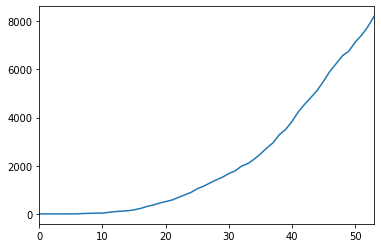

In [14]:
df_daily['Kasus (Kumulatif)'].plot()

In [15]:
df_daily_sird

,Sus,Inf,Rec,Dea,weight
0,1.000000,1.000000e-08,0.000000e+00,0.000000e+00,2
1,1.000000,1.000000e-08,0.000000e+00,0.000000e+00,2
2,1.000000,1.000000e-08,0.000000e+00,0.000000e+00,2
3,1.000000,1.000000e-08,0.000000e+00,0.000000e+00,2
4,1.000000,2.000000e-08,0.000000e+00,0.000000e+00,2
5,1.000000,2.000000e-08,0.000000e+00,0.000000e+00,2
6,1.000000,3.000000e-08,0.000000e+00,0.000000e+00,2
7,1.000000,9.500000e-08,0.000000e+00,0.000000e+00,2
8,1.000000,1.350000e-07,0.000000e+00,0.000000e+00,2
9,1.000000,1.500000e-07,1.000000e-08,1.000000e-08,2


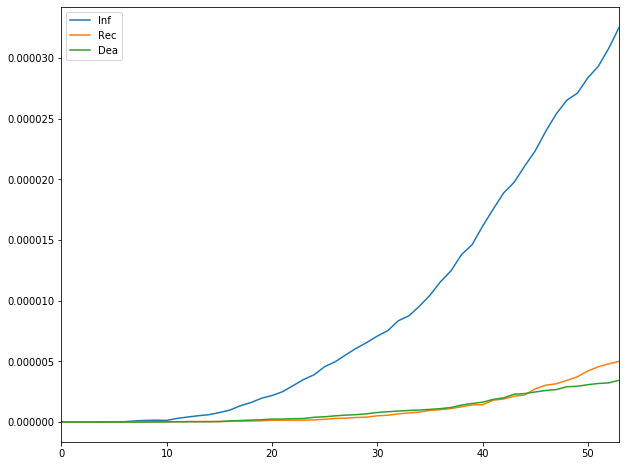

In [16]:
df_daily_sird[['Inf','Rec','Dea']].plot(figsize=(10,8))

## Tuning Parameter SIRD Model

The tuning parameter is more focus on I and R.. meanwhile the newest data is more influence the model than the last one.. (using weight)

In [17]:
# param_b,param_r,param_m

In [18]:
## Summary
## First 23 day --> [0.30421772, 0.01571879, 0.02715623] (1.13785449363775)
## First 25 day --> [0.2942096 , 0.01569591, 0.02679847] (2.7496582873743516)
## First 27 day --> [0.282616  , 0.01432964, 0.02584207] (5.365068009)
## First 28 day --> [0.27636661, 0.01389041, 0.02523562]
## First 34 day --> [0.25272228, 0.01689525, 0.02514914] (61.60118585319816)
## First 42 day --> [0.22767359, 0.02074732, 0.0213562 ] (255.07607154442)

In [19]:
df_daily_sird.shape

(54, 5)

### Training All Data

In [20]:
## all current data
df_daily0=df_daily_sird.copy()
prt=int(len(df_daily0)/5)+1
weight_ls=[3.5]*prt+[3]*prt+[0.3]*prt+[0.1]*prt+[0.05]*prt
weight_ls2=weight_ls[:len(df_daily0)]
weight_ls2.sort()
df_daily0['weight']=weight_ls2

In [21]:
df_daily0.tail()

,Sus,Inf,Rec,Dea,weight
49,0.999966,0.000027,0.000004,0.000003,3.5
50,0.999964,0.000028,0.000004,0.000003,3.5
51,0.999963,0.000029,0.000005,0.000003,3.5
52,0.999961,0.000031,0.000005,0.000003,3.5
53,0.999959,0.000033,0.000005,0.000003,3.5


In [28]:
all_param,cost_value=pso_sird(df0=df_daily0,population=NUMB_OF_POPS)

2020-04-25 05:34:39,888 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.15, 'c2': 0.95, 'w': 0.25}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=3.21e+3
2020-04-25 05:34:55,247 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3212.650484456066, best pos: [0.31638693 0.07648542 0.0886849 ]
2020-04-25 05:34:55,265 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.15, 'c2': 0.95, 'w': 0.25}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=2.08e+3
2020-04-25 05:35:10,477 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2083.6949990672742, best pos: [0.22173841 0.02145208 0.0442702 ]
2020-04-25 05:35:10,493 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.15, 'c2': 0.95, 'w': 0.25}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=2.21e+3
2020-04-25 05:35:25,829 - pyswarms.single.global_best - INFO - Optimization finished | 

In [29]:
# (array([0.21159807, 0.02629372, 0.02874776]), 1991.6036595702744)
all_param,cost_value

(array([0.2336316 , 0.03497049, 0.04296428]), 2083.6949990672742)

In [30]:
# all_param=[0.27808851,0.0143996,0.02582378] # --> (8.614889469)
all_param = [0.21159807, 0.02629372, 0.02874776]

In [31]:
## Predict
T_start = 0.0
T_inc=1.0
# T_end = 23+4
T_end = 30*6

I0=2/NUMB_OF_POPS
S0=1-I0
INPUT = (S0, I0, 0.0, 0.0)
col_use_pred=[x+'_pred' for x in col_use]
T_range = np.arange(T_start, T_end+T_inc, T_inc)
RES = sird_model(all_param,INPUT,T_range)
df_sird_pred=pd.DataFrame(RES,columns=['Sus_pred','Inf_pred','Rec_pred','Dea_pred'])*NUMB_OF_POPS

In [34]:
data_check=pd.concat([df_daily[['Inf','Rec','Dea']],df_sird_pred[['Inf_pred','Rec_pred','Dea_pred']]],axis=1)
error_Inf=np.abs(data_check[26-prt:26]['Inf']-data_check[26-prt:26]['Inf_pred']).mean()
error_Rec=np.abs(data_check[26-prt:26]['Rec']-data_check[26-prt:26]['Rec_pred']).mean()
data_check['Inf_pred_max']=data_check['Inf_pred']+error_Inf
data_check['Inf_pred_min']=data_check['Inf_pred']-error_Inf
data_check['Rec_pred_max']=data_check['Rec_pred']+error_Rec
data_check['Rec_pred_min']=data_check['Rec_pred']-error_Rec
data_check[45:65]

,Inf,Rec,Dea,Inf_pred,Rec_pred,Dea_pred,Inf_pred_max,Inf_pred_min,Rec_pred_max,Rec_pred_min
45,4472.0,548.0,496.0,2500.588265,419.643427,458.809500,2925.033804,2076.142727,435.589966,403.696888
46,4796.0,607.0,520.0,2923.365206,490.650691,536.443999,3347.810744,2498.919667,506.597230,474.704152
47,5082.0,631.0,535.0,3418.342698,573.784704,627.337058,3842.788237,2993.897159,589.731243,557.838165
48,5307.0,686.0,582.0,3998.380156,671.205479,733.850289,4422.825694,3573.934617,687.152018,655.258940
49,5423.0,747.0,590.0,4676.549349,785.108707,858.384309,5100.994887,4252.103810,801.055246,769.162168
50,5677.0,842.0,616.0,5470.291351,918.424120,1004.142289,5894.736889,5045.845812,934.370659,902.477582
51,5869.0,913.0,636.0,6398.144354,1074.265769,1174.528918,6822.589893,5973.698816,1090.212308,1058.319230
52,6168.0,960.0,647.0,7483.676021,1256.592757,1373.872810,7908.121560,7059.230483,1272.539296,1240.646218
53,6520.0,1002.0,689.0,8753.084814,1469.806208,1606.985855,9177.530353,8328.639276,1485.752747,1453.859669
54,NaN,NaN,NaN,10236.996878,1719.051332,1879.493473,10661.442417,9812.551339,1734.997871,1703.104793


In [35]:
date_1 = dt.datetime.strptime("2020-03-02", "%Y-%m-%d")
all_date=[date_1 + dt.timedelta(days=int(i)) for i in range(T_end+1)]
df_sird_pred.index=all_date

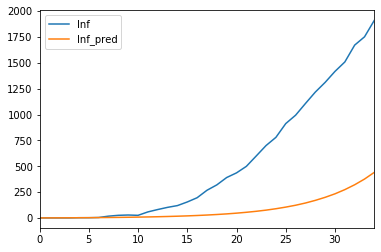

In [37]:
check_col='Inf'
data_check[:35][[check_col,check_col+'_pred']].plot()

In [38]:
# df_sird_pred['Dea_pred'].max()

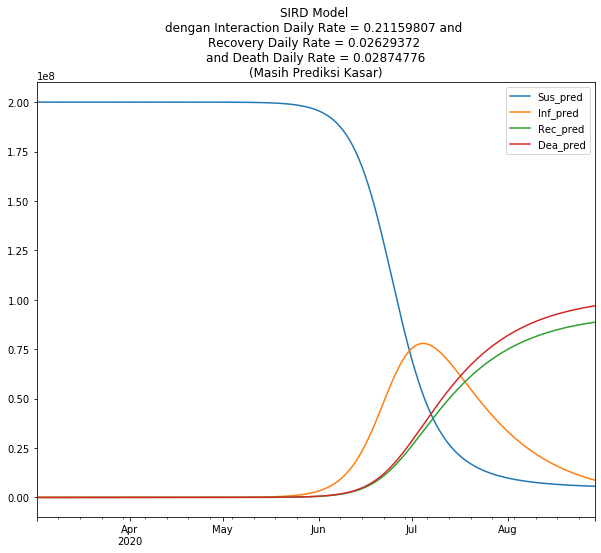

In [39]:
# df_sird_pred[['Inf_pred','Rec_pred','Dea_pred']].plot(figsize=(10,8))
txt='SIRD Model \ndengan Interaction Daily Rate = '+str(all_param[0])+' and \nRecovery Daily Rate = '+str(
            all_param[1])+' \nand Death Daily Rate = '+str(all_param[2])+'\n(Masih Prediksi Kasar)'
sird_plot =df_sird_pred.plot(figsize=(10,8),title=txt)
fig = sird_plot.get_figure()
fig.savefig(PATH_IMG+CURR_DATE+"sird_result.png")

In [40]:
# # df_sird_pred[['Inf_pred','Rec_pred','Dea_pred']].plot(figsize=(10,8))
# txt='SIRD Model \ndengan Interaction Daily Rate = '+str(all_param[0])+' and \nRecovery Daily Rate = '+str(
#             all_param[1])+' \nand Death Daily Rate = '+str(all_param[2])+'\n(Masih Prediksi Kasar)'
# sird_plot =df_sird_pred.plot(figsize=(10,8),title=txt)
# fig = sird_plot.get_figure()
# fig.savefig(PATH_IMG+CURR_DATE+"sird_result.png")

## Rate Changes

In [29]:
## Summary
Param_changes=[[23, 0.30421772, 0.01571879, 0.02715623],
[25,0.2942096 , 0.01569591, 0.02679847], 
[27,0.282616  , 0.01432964, 0.02584207],
[28,0.27636661, 0.01389041, 0.02523562],
[34,0.25272228, 0.01689525, 0.02514914],
[42,0.22767359, 0.02074732, 0.0213562 ]]

df_Param_changes=pd.DataFrame(Param_changes,columns=['Days','Contact Daily Rate','Recovery Daily Rate','Death Daily Rate'])
df_Param_changes.index=df_Param_changes.Days
del df_Param_changes['Days']


In [30]:
df_Param_changes

,Contact Daily Rate,Recovery Daily Rate,Death Daily Rate
Days,,,
23,0.304218,0.015719,0.027156
25,0.294210,0.015696,0.026798
27,0.282616,0.014330,0.025842
28,0.276367,0.013890,0.025236
34,0.252722,0.016895,0.025149
42,0.227674,0.020747,0.021356


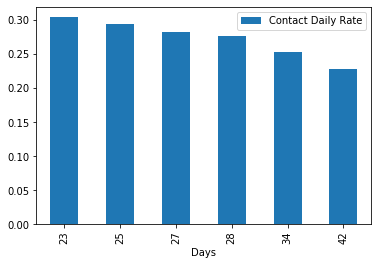

In [31]:
df_Param_changes[['Contact Daily Rate']].plot(kind='bar')

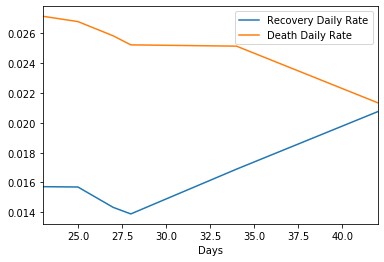

In [32]:
df_Param_changes[['Recovery Daily Rate','Death Daily Rate']].plot()

## Conclusion

...